Primeiras linhas do dataset:
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  \
0            1         0       3    0  22.0      1      0   7.2500   
1            2         1       1    1  38.0      1      0  71.2833   
2            3         1       3    1  26.0      0      0   7.9250   
3            4         1       1    1  35.0      1      0  53.1000   
4            5         0       3    0  35.0      0      0   8.0500   

   Embarked_Q  Embarked_S  
0       False        True  
1       False       False  
2       False        True  
3       False        True  
4       False        True  

🔎 Regressão Logística - Acurácia: 0.7809
Matriz de Confusão:
 [[85 24]
 [15 54]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81       109
           1       0.69      0.78      0.73        69

    accuracy                           0.78       178
   macro avg       0.77      0.78      0.77       178

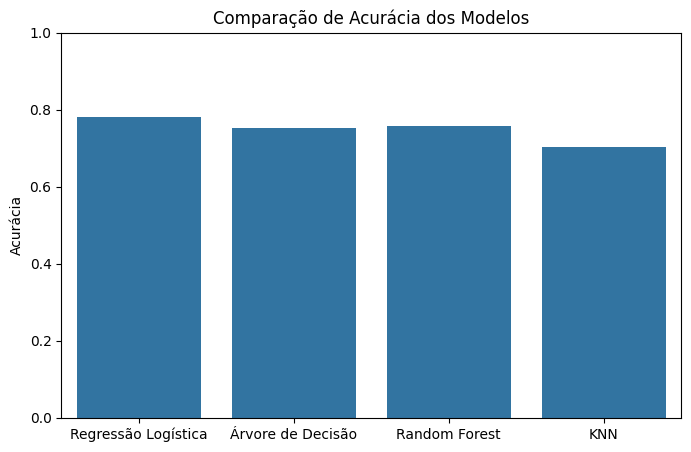

In [10]:
# ================================================
# 📦 IMPORTAR BIBLIOTECAS
# ================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ================================================
# 🧹 FUNÇÃO: CARREGAR E LIMPAR OS DADOS
# ================================================
def load_and_clean_data(url):
    df = pd.read_csv(url)
    df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
    df['Age'] = df['Age'].fillna(df['Age'].mean())
    df = df.dropna(subset=['Embarked'])
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
    return df

# ================================================
# 📥 CARREGAR DADOS
# ================================================
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = load_and_clean_data(url)

print("Primeiras linhas do dataset:")
print(df.head())

# ================================================
# ⚙️ FUNÇÃO: TREINAR E AVALIAR MODELOS
# ================================================
def train_and_evaluate(model, X_train, y_train, X_test, y_test, model_name="Modelo"):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n🔎 {model_name} - Acurácia: {accuracy_score(y_test, y_pred):.4f}")
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
    return accuracy_score(y_test, y_pred), y_pred, model

# ================================================
# 🎯 DIVIDIR DADOS EM TREINO E TESTE
# ================================================
X = df.drop(['Survived', 'PassengerId'], axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ================================================
# 🚀 TREINAR E AVALIAR MODELOS
# ================================================
acc_lr, _, lr_model = train_and_evaluate(
    LogisticRegression(max_iter=200), X_train, y_train, X_test, y_test, "Regressão Logística"
)

acc_tree, _, tree_model = train_and_evaluate(
    DecisionTreeClassifier(random_state=42), X_train, y_train, X_test, y_test, "Árvore de Decisão"
)

acc_rf, _, rf_model = train_and_evaluate(
    RandomForestClassifier(n_estimators=100, random_state=42), X_train, y_train, X_test, y_test, "Random Forest"
)

acc_knn, _, knn_model = train_and_evaluate(
    KNeighborsClassifier(n_neighbors=5), X_train, y_train, X_test, y_test, "KNN"
)

# ================================================
# ⭐ IMPORTÂNCIA DAS FEATURES (Random Forest)
# ================================================
print("\n📌 Importância das variáveis (Random Forest):")
importances = rf_model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

# ================================================
# 📊 GRÁFICO COMPARATIVO DE ACURÁCIAS
# ================================================
scores = {
    'Regressão Logística': acc_lr,
    'Árvore de Decisão': acc_tree,
    'Random Forest': acc_rf,
    'KNN': acc_knn
}

model_names = list(scores.keys())
model_scores = list(scores.values())

plt.figure(figsize=(8,5))
sns.barplot(x=model_names, y=model_scores)
plt.title('Comparação de Acurácia dos Modelos')
plt.ylim(0,1)
plt.ylabel('Acurácia')
plt.show()


# 🛳️ Mini-Projeto Titanic: Classificação de Sobrevivência

Neste notebook, vamos prever a sobrevivência de passageiros do Titanic usando:
- Regressão Logística
- Árvore de Decisão
- Random Forest
- KNN

Ao final, vamos comparar os modelos e analisar a importância das variáveis.

## ✅ Conclusão

- O Random Forest teve a melhor performance geral, seguido por...
- É possível melhorar cada modelo ajustando hiperparâmetros.
- Próximos passos: testar mais features, normalização de dados, cross-validation.

🚀 **Projeto pronto para portfólio!**
